In [1]:
import openslide
from openslide import open_slide
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
slide = open_slide("../Softsensor.ai/Assignment_dataset/whole_slide_images/Normal Lymphnode.svs")

In [3]:
slide_pros = slide.properties
print(slide_pros)

<_PropertyMap {'aperio.AppMag': '40', 'aperio.MPP': '0.241158', 'openslide.comment': 'Aperio Image Library v10.2.24\r\r\n35817x38693 [0,0 35817x38693] [256x256] JPEG/YCbCr Q = 75|AppMag = 40|MPP = 0.241158', 'openslide.level-count': '3', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '38693', 'openslide.level[0].tile-height': '256', 'openslide.level[0].tile-width': '256', 'openslide.level[0].width': '35817', 'openslide.level[1].downsample': '4.0001075312368233', 'openslide.level[1].height': '9673', 'openslide.level[1].tile-height': '256', 'openslide.level[1].tile-width': '256', 'openslide.level[1].width': '8954', 'openslide.level[2].downsample': '16.003044636184825', 'openslide.level[2].height': '2418', 'openslide.level[2].tile-height': '256', 'openslide.level[2].tile-width': '256', 'openslide.level[2].width': '2238', 'openslide.mpp-x': '0.24115800000000001', 'openslide.mpp-y': '0.24115800000000001', 'openslide.objective-power': '40', 'openslide.quickhash-1': '30d7e

In [4]:
print("vendor is : ", slide_pros['openslide.vendor'])

vendor is :  aperio


In [5]:
print("pixel size of x : ", slide_pros['openslide.mpp-x'])

pixel size of x :  0.24115800000000001


In [6]:
print("pixel size of y : ", slide_pros['openslide.mpp-y'])

pixel size of y :  0.24115800000000001


In [7]:
objective = float(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])

In [8]:
print("The objective power : ", objective)

The objective power :  40.0


In [9]:
# show slide dimension
slide_dimes = slide.dimensions
print(slide_dimes)

(35817, 38693)


In [10]:
slide_thumb_600 = slide.get_thumbnail(size = (600, 600))
slide_thumb_600.show()

In [11]:
slide_thumb_600_np = np.array(slide_thumb_600)

In [12]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

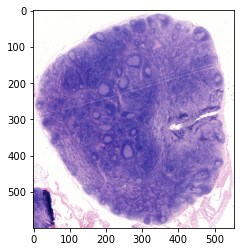

In [13]:
plt.imshow(slide_thumb_600_np)

In [14]:
# show dimesion
dims = slide.level_dimensions
num_level = len(dims)
print("the number of level in this image are : ", num_level)

the number of level in this image are :  3


In [15]:
print("Dimension of various level  of this image are : ", dims)

Dimension of various level  of this image are :  ((35817, 38693), (8954, 9673), (2238, 2418))


In [16]:
factors = slide.level_dimensions
print("Each level is downampled by amount : ", factors)

Each level is downampled by amount :  ((35817, 38693), (8954, 9673), (2238, 2418))


In [19]:
# level three dimension
level3_dim = dims[2]

In [20]:
level3_img = slide.read_region((0,0),2,level3_dim)
level3_img_rgb = level3_img.convert('RGB')
level3_img_rgb.show()

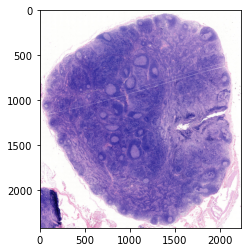

In [22]:
level3_img_np = np.array(level3_img_rgb)
plt.imshow(level3_img_np)

In [23]:
SCALE_FACTOR = 32
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)

In [26]:
from openslide.deepzoom import DeepZoomGenerator
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
print("the number of level in the tile object's are : ", tiles.level_count)

the number of level in the title object's are :  17


In [28]:
print("the number of dimension in the tile slides are : ", tiles.level_dimensions)

the number of dimension in the tile slides are :  ((1, 1), (2, 2), (3, 3), (5, 5), (9, 10), (18, 19), (35, 38), (70, 76), (140, 152), (280, 303), (560, 605), (1120, 1210), (2239, 2419), (4478, 4837), (8955, 9674), (17909, 19347), (35817, 38693))


In [29]:
# total no of tiles
print("Total No. of tiles : ", tiles.tile_count)

Total No. of tiles :  28409


In [30]:
# shape of tile at this level
level_num = 11
print("Tile shape at level : ", level_num," is ", tiles.level_tiles[level_num])

Tile shape at level :  11  is  (5, 5)


In [31]:
print("This mean there are : ", tiles.level_tiles[level_num][0]*tiles.level_tiles[level_num][0])

This mean there are :  25


In [34]:
tile_dims = tiles.get_tile_dimensions(11,(0,0))

In [35]:
tile_count_in_large_image = tiles.level_tiles[16]

In [36]:
tile_dims = tiles.get_tile_dimensions(16,(120,140))

In [37]:
tile_dims = tiles.get_tile_dimensions(16,(125,150))

In [38]:
single_tile = tiles.get_tile(16,(62,70))
single_tile_rgb = single_tile.convert('RGB')
single_tile_rgb.show()

In [39]:
cols, rows = tiles.level_tiles[16]

In [42]:
import os
tile_dir = "../Softsensor.ai/basedata/training/normal_node/"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, '%d_%d' %(col, row))
        print("now saving tile with title : ", tile_name)
        temp_tile = tiles.get_tile(16,(col, row))
        temp_tile_rgb = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_rgb)
        plt.imsave(tile_name+".png", temp_tile_np)

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/0_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_0
now saving tile with title :  C:/Users/mr/OneDri

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_0
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_0
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_1
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_1
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_2
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_2
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_3
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_3
now saving tile with title :  C:/Users

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_4
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_4
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_5
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_5
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_6
now saving tile with title :  C:/Users/mr/OneDri

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_6
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_7
now saving tile with title :  C:/Users/mr/OneDri

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_7
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/138_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/139_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/0_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_8
now saving tile with title :  C:/Users/mr/On

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_8
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_8
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_9
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/120_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_9
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_10
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_10
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_11
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_11
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_12
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_12
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_13
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_13
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_14
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_14
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_15
now saving tile with title :  C:/Us

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_15
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/137_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/138_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/139_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/0_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_16
now saving tile with title :  C:/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_16
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/120_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_16
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_17
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_17
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_18
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_18
now saving tile with title :  C:/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_19
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_19
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_20
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_20
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_21
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_21
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_22
now saving tile with title :  C:/Users

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_22
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_22
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_23
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_23
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_24
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_24
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_25
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_25
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_26
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_26
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_26
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_27
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_27
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_28
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_28
now saving tile with title :  

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_29
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_29
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_30
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_30
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_31
now saving tile with title :  C:/Users/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_31
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_31
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_32
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_32
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_33
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_33
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_34
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_34
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_35
now saving tile with title :  C:/Us

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_35
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_35
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_36
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_36
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_37
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_37
now saving tile with title :  C

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_38
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_38
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_39
now saving tile with title :  C:/Us

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_39
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_40
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_40
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_40
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_41
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_41
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_42
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_42
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_43
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_43
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_44
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_44
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_44
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_45
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_45
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_46
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_46
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_47
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_47
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_48
now saving tile with title :  C:/Users/m

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_48
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_48
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_49
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_49
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_50
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_50
now saving tile with title : 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_51
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_51
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_52
now saving tile with title :  C:/User

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_52
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/137_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/138_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/139_52
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_53
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_53
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_54
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_54
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_55
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_55
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_56
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_56
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_57
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_57
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_57
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_58
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_58
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_59
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_59
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_60
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_60
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_61
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_61
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_62
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_62
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_62
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_63
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_63
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_64
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_64
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_65
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_65
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_66
now saving tile with title :  C:/Users/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_66
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/137_66
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_67
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_67
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_68
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_68
now saving tile with title : 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_69
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_69
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_70
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_70
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_71
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_71
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_71
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_72
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_72
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_73
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_73
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_74
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_74
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_75
now saving tile with title :  C:/Use

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_75
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_75
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_76
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/120_76
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_77
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_77
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_78
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_78
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_79
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_79
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_80
now saving tile with title :  C:/User

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_80
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_80
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_81
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_81
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_82
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_82
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_83
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_83
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_84
now saving tile with title :  C:/Users

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_84
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/137_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/138_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/139_84
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_85
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/120_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_85
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_86
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_86
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_87
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_87
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_88
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_88
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_89
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_89
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_89
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_90
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_90
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_91
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_91
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_92
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_92
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_93
now saving tile with title :  C:/Users/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_93
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_93
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_94
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/120_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_94
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_95
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_95
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_96
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_96
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_97
now saving tile with title :  C:/Us

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_97
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_98
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_98
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_98
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_99
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_99
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_100
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_100
now saving tile with 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_101
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_101
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_102
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_102
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_103
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_103
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/137_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/138_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/139_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/0_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_104
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_104
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/120_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_104
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_105
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_105
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_106
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_106
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_107
now saving tile with title :  C

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_107
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_107
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_108
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_108
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_108
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_109
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_109
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_109
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_110
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_110
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_110
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_110
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_111
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_111
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_111
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_112
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_112
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_112
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_113
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_113
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_113
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_114
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_114
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_114
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_114
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_115
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_115
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_115
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_116
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_116
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_116
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_117
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_117
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_117
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_118
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_118
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_118
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_118
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_119
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_119
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_119
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_120
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_120
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_120
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_121
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_121
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_121
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_122
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_122
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_122
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_122
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/54_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_123
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/115_123
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/116_123
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_124
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_124
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_124
now saving tile with titl

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_125
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_125
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/138_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/139_125
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/0_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/1_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_126
now saving tile with title :  

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_126
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_126
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_126
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_127
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_127
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_127
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_128
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_128
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_128
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_129
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_129
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_129
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_129
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_130
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_130
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_130
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_131
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_131
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_131
now saving tile with 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_132
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/82_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/83_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/84_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_132
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_132
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_133
now saving tile with title :  C:/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_133
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_133
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_133
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_134
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_134
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/114_134
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_135
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_135
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_135
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/11_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/12_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_136
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_136
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/136_136
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/137_136
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/55_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/56_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_137
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/117_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/118_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/119_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/120_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_137
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_137
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_138
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/105_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/106_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_138
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_138
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_139
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_139
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/97_139
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/20_140
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_140
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_140
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_141
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_141
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/134_141
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/135_141
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/57_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/58_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/59_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/60_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/61_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/62_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_142
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/121_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/122_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/123_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_142
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_142
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/41_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/42_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/43_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/44_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/45_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/46_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_143
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_143
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_143
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/28_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/29_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/30_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/31_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/32_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/33_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_144
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/92_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/93_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/94_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/95_144
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/96_144
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/13_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/14_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/15_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/16_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/17_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/18_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/19_145
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/75_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/76_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/77_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/78_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/79_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/80_145
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/81_145
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/2_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/3_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_146
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_146
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/124_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/125_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/126_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_146
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_146
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/47_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/48_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/49_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/50_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/51_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/52_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/53_147
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/107_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/108_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/109_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/110_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/111_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/112_147
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/113_147
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/34_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/35_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/36_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/37_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/38_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/39_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/40_148
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/98_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/99_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/100_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/101_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/102_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/103_148
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/104_148
now saving tile with t

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/21_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/22_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/23_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/24_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/25_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/26_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/27_149
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/85_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/86_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/87_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/88_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/89_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/90_149
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/91_149
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/4_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/5_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/6_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/7_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/8_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/9_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/10_150
now saving tile with title :  C:/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/63_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/64_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/65_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/66_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/67_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_150
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/127_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/128_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/129_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/130_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/131_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/132_150
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/133_150
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/68_151
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/69_151
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/70_151
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/71_151
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/72_151
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/73_151
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir/74_151
now saving tile with title 